# Homework 2

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

### Definition:
The first part of this assignment consists in studying a single particle performing a continuous-time random walk in the network described by the graph in Fig. 1 and with the following transition rate matrix:

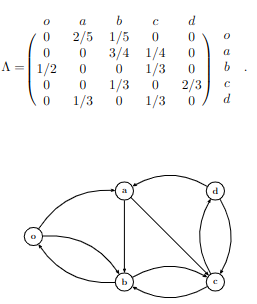

Your task is to simulate the particle moving around in the network in continuous time according to the transition rate matrix (1). To help you with this we have provided a hint below. You should then use these simulations to answer the following questions:

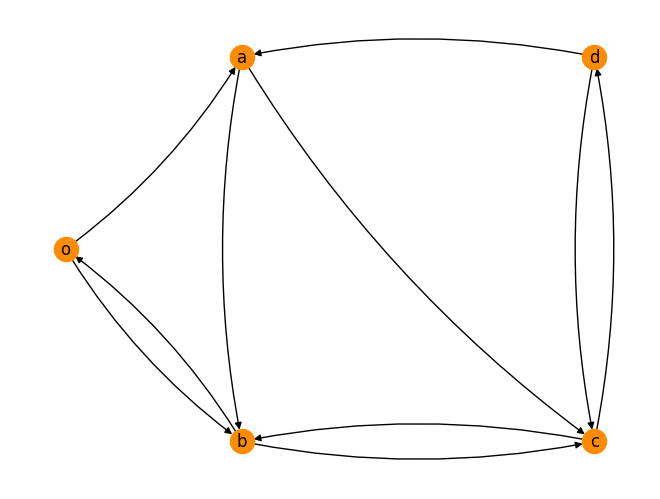

In [2]:
G = nx.DiGraph()
G.add_weighted_edges_from([('o', 'a', 2 / 5), ('o', 'b',1 / 5),
                           ('a', 'b', 3 / 4), ('a', 'c',1 / 4),
                           ('b', 'c', 1 / 3), ('b', 'o',1 / 2),
                           ('c', 'b', 1 / 3), ('c', 'd',2 / 3),
                           ('d', 'a', 1 / 3), ('d', 'c',1 / 3)])
                           


node_positions = {'o': (-2, 0), 'a': (-1, 1), 'b': (-1, -1), 'c': (1, -1), 'd': (1, 1)}

node_color = 'darkorange'
nx.draw(G, pos=node_positions, with_labels=True, node_color=node_color, connectionstyle='arc3, rad = 0.1')
plt.show()

In [3]:
# Define the Transition Rate Matrix
Lambda = [
    [0, 2 / 5, 1 / 5, 0, 0],
    [0, 0, 3 / 4, 1 / 4, 0],
    [1 / 2, 0, 0, 1 / 3, 0],
    [0, 0, 1 / 3, 0, 2 / 3],
    [0, 1 / 3, 0, 1 / 3, 0],
]


# Calculate the total rate of leaving each node - adjacency matrix (v)
W_Vector = np.sum(Lambda, axis=1)
print("w -> (Rates of total leave) :\n", W_Vector)

# Maximum value in w, representing the highest transition rate
w_star = np.max(W_Vector)
print("w* -> (Rate of maximum transition) :\n", w_star)

# Diagonal matrix with elements from v
DMatrix = np.diag(W_Vector)
print("D -> (Diagonal matrix) :\n", DMatrix)

# Normalized adjacency matrix of the graph (P)
PMatrix = np.linalg.inv(DMatrix) @ Lambda
print("P -> (Normalized transition matrix) :\n", PMatrix)

# Compute the modified transition rates for the continuous-time random walk (Q) off diagonal part of Q
QMatrix = Lambda / w_star
QMatrix += np.diag(np.ones(len(W_Vector)) - np.sum(QMatrix, axis=1))
print("Q -> (Modified transition rates matrix) :\n", QMatrix)

# Cumulative sum of Q for random selection of next states
Cumulative_Q = np.cumsum(QMatrix, axis=1)

w -> (Rates of total leave) :
 [0.6        1.         0.83333333 1.         0.66666667]
w* -> (Rate of maximum transition) :
 1.0
D -> (Diagonal matrix) :
 [[0.6        0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.83333333 0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.66666667]]
P -> (Normalized transition matrix) :
 [[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.6        0.         0.         0.4        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.5        0.         0.5        0.        ]]
Q -> (Modified transition rates matrix) :
 [[0.4        0.4        0.2        0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.16666667 0.33333333 0.        ]
 [0.  

### Exercise 1 >> Part a
What is, according to the simulations, the average time it takes a particle that starts in node $b$ to leave the node and then return to it?

In [4]:
def avgTimeReturnJourney(start_node, end_node, simulations=10000):
    return_times = np.zeros(simulations)

    for k in range(simulations):
        current_position = start_node
        total_time = 0
        
        while current_position != end_node or total_time == 0:
            transition_time = -np.log(np.random.rand()) / w_star
            next_node = np.argmax(Cumulative_Q[current_position] > np.random.rand())
            total_time += transition_time
            current_position = next_node

        return_times[k] = total_time

    return np.mean(return_times)

average_return_time = avgTimeReturnJourney(start_node=1, end_node=1)
print("Average travel time for a round trip starting and ending at node b: ", average_return_time)

Average travel time for a round trip starting and ending at node b:  6.693910570071941


### Exercise 1 >> Part b
How does the result in a) compare to the theoretical return-time Eb[T+ b ]?

In [5]:
n_nodes = len(W_Vector)

def theoreticalReturnTime(start_node):
    
    Set_S = [start_node]
    Set_R = [node for node in range(n_nodes) if node not in Set_S]
    
    Matrix_P_hat = PMatrix[np.ix_(Set_R, Set_R)]
    Vector_w_hat = W_Vector[np.ix_(Set_R)]
    
    x_hat = np.linalg.solve(np.identity(len(Set_R)) - Matrix_P_hat, np.ones(len(Set_R)) / Vector_w_hat)
    
    hitting_times = np.zeros(n_nodes)
    hitting_times[Set_R] = x_hat
    
    expected_time = 1 / W_Vector[start_node] + np.dot(PMatrix[start_node], hitting_times)
    return expected_time

expected_return_time = theoreticalReturnTime(start_node=1)
error_simulation = abs(average_return_time - expected_return_time)

print("Return time (Theoretical): ", expected_return_time)
print("Simulation and theory Difference: ", error_simulation)

Return time (Theoretical):  6.708333333333333
Simulation and theory Difference:  0.014422763261392468


### Exercise 1 >> Part c
What is, according to the simulations, the average time it takes to move from node o to node
d?


In [6]:
average_time_o_to_d = avgTimeReturnJourney(start_node=0, end_node=4, simulations=1000)
print("Estimated average time for travelling from node 'o' to 'd' : ", average_time_o_to_d)

Estimated average time for travelling from node 'o' to 'd' :  11.083170978382498


### Exercise 1 >> Part d
How does the result in c) compare to the theoretical hitting-time Eo[Td]?

In [7]:
def theoreticalHittingTime(start_node, target_node):
    
    reachable_nodes = [node for node in range(n_nodes) if node != target_node]

    P_hat = PMatrix[np.ix_(reachable_nodes, reachable_nodes)]
    v_hat = W_Vector[np.ix_(reachable_nodes)]
    x_hat = np.linalg.solve(np.identity(len(reachable_nodes)) - P_hat, np.ones(len(reachable_nodes)) / v_hat)
    hitting_times = np.zeros(n_nodes)
    hitting_times[reachable_nodes] = x_hat
    
    return hitting_times[start_node]

expected_hitting_time_od = theoreticalHittingTime(start_node=0, target_node=4)
simulation_error = abs(average_time_o_to_d - expected_hitting_time_od)

print("Calculated theoretical hitting time (o to d):", expected_hitting_time_od)
print("Difference between simulation and theory:", simulation_error)

Calculated theoretical hitting time (o to d): 10.766666666666666
Difference between simulation and theory: 0.31650431171583193


### Exercise 1 >> Part e
Interpret the matrix Λ as the weight matrix of a graph G = (V,E,Λ), and simulate the French-DeGroot dynamics on G with an arbitrary initial condition x(0). Does the dynamics convergeto a consensus state for every initial condition x(0)?

Consensus state: [0.3153857  0.31539159 0.31537031 0.31540811 0.3153649 ]
Consensus value: 0.3153846153846155


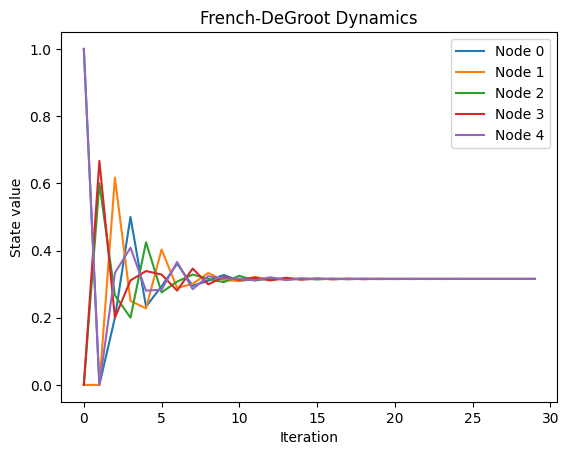

In [8]:
def french_DeGroot_dynamics(P, initial_state, iterations=30):
    states = np.zeros((len(initial_state), iterations))
    states[:, 0] = initial_state

    for z in range(1, iterations):
        states[:, z] = P @ states[:, z - 1]

    return states

initial_state = np.array([1, 0, 0, 0, 1])
iterations = 30
states = french_DeGroot_dynamics(PMatrix, initial_state, iterations)

consensus_state = states[:, -1]
eigenvectors = np.linalg.eig(PMatrix.T)[1]
consensus_vector = eigenvectors[:, np.isclose(np.linalg.eig(PMatrix.T)[0], 1)].real
consensus_vector /= np.sum(consensus_vector)
consensus_value = consensus_vector.T @ initial_state

print("Consensus state:", consensus_state)
print("Consensus value:", consensus_value[0])


for i in range(len(initial_state)):
    plt.plot(states[i], label=f'Node {i}')
plt.xlabel('Iteration')
plt.ylabel('State value')
plt.title('French-DeGroot Dynamics')
plt.legend()
plt.show()

### Exercise 1 >> Part f
Assume that the initial state of the dynamics for each node i ∈ V is given by xi(0) = ξi, where {ξi}i∈V are independent random variables with variance

\begin{equation}
\sigma_a^{2} = \sigma_b^{2} = \sigma_c^{2} = 1, = \sigma_o^{2} = \sigma_d^{2}= 2
\end{equation}

Compute the variance of the consensus value, and compare your results with the numerical simulations.

In [9]:
# Function to calculate variance through simulations
def calculate_consensus_variance(simulations=200):
    variances = np.zeros(simulations)

    for j in range(simulations):
        starting_state = np.random.rand(5)
        for m in range(500):
            starting_state = PMatrix @ starting_state
        variances[j] = (np.mean(starting_state) - 0.5) ** 2

    return np.mean(variances)

simulated_variance = calculate_consensus_variance()
expected_variance = np.sum(np.square(consensus_vector)) * 1 / 12

print("Calculated Simulated Consensus Variance: ", simulated_variance)
print("Theoretical Expected Consensus Variance: ", expected_variance)


Calculated Simulated Consensus Variance:  0.015134774378825178
Theoretical Expected Consensus Variance:  0.017465483234714013


### Exercise 1 >> Part g
Remove the edges (d,a) and (d,c). Describe and motivate the asymptotic behaviour of the dynamics. If the dynamics converges to a consensus state, how is the consensus value related to the initial condition x(0)? 

Assume that the initial state of the dynamics for each node i ∈ V is given by xi(0) = ξi, where {ξi}i∈V are i.i.d. random variables with variance σ2.

Compute analytically the variance of the consensus value.

In [10]:

G_modified = G.copy()
G_modified.remove_edges_from([('d', 'a'), ('d', 'c')])
G_modified.add_edge('d', 'd', weight=1e-4)

def recalculateTransitionMatrix(G_mod):
    W_mod = nx.adjacency_matrix(G_mod).toarray()
    W_mod[4, 4] = 1e-4
    degree_mod = np.sum(W_mod, axis=1)
    D_mod = np.diag(degree_mod)
    P_mod = np.linalg.inv(D_mod) @ W_mod
    return P_mod

P_modified = recalculateTransitionMatrix(G_modified)

iterations = 70

def french_DeGroot_modified_dynamics(initial_condition, iterations=iterations):
    state_mod = initial_condition
    for _ in range(iterations):
        state_mod = P_modified @ state_mod
    return state_mod

initial_condition_random = np.random.rand(5)
print('Initial Random Condition:', np.array2string(initial_condition_random, precision=4, separator='   '))  
asymptotic_state = french_DeGroot_modified_dynamics(initial_condition_random)
print("Asymptotic State: ", np.array2string(asymptotic_state, precision=4, separator='   '))

def calculateConsensusVarianceModified():
    variances_mod = np.zeros(200)
    for i in range(200):
        initial_state = np.random.rand(5)
        variance_initial = np.var(initial_state)
        for _ in range(500):
            initial_state = P_modified @ initial_state
        variances_mod[i] = (np.mean(initial_state) - 0.5) ** 2
    return np.mean(variances_mod)

variance_consensus = calculateConsensusVarianceModified()
print("Modified Consensus State Variance: ", variance_consensus)

Initial Random Condition: [0.3088   0.477    0.1973   0.9268   0.6896]
Asymptotic State:  [0.6896   0.6896   0.6896   0.6896   0.6896]
Modified Consensus State Variance:  0.0863345352079422


### Exercise 1 >> Part h
Consider the graph (V,E,Λ), and remove the edges (c,b) and (d,a). Analyse the French-DeGroot dynamics on the new graph. In particular, describe how the asymptotic behaviour of the dynamics varies in terms of the initial condition x(0).

Initial Random Condition x(0): [0.0594, 0.4073, 0.4764, 0.1093, 0.9013]
Final State after Evolution: [0.5358, 0.5662, 0.2921, 0.9013, 0.1093]


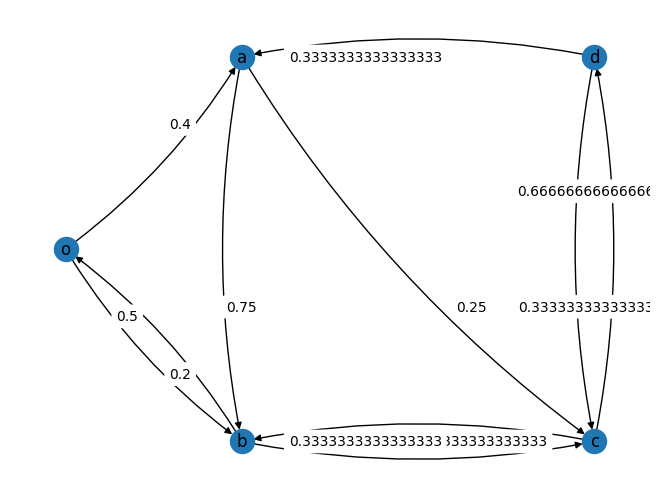

In [11]:
G_reconstructed = nx.DiGraph()

G_reconstructed.add_weighted_edges_from([('o', 'a', float("{0:.2f}".format(2 / 5))), ('o', 'b', float("{0:.2f}".format(1 / 5))),
                           ('a', 'b', float("{0:.2f}".format(3 / 4))), ('a', 'c', float("{0:.2f}".format(1 / 4))),
                           ('b', 'o', float("{0:.2f}".format(1 / 2))), ('b', 'c', float("{0:.2f}".format(1 / 2))),
                           ('c', 'd', float("{0:.2f}".format(2 / 3))), ('d', 'c', float("{0:.2f}".format(1 / 3)))])

positions = {'o': (-2, 0), 'a': (-1, 1), 'b': (-1, -1), 'c': (1, -1), 'd': (1, 1)}
nx.draw(G, pos=positions, with_labels=True,connectionstyle='arc3, rad = 0.1')
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, positions, edge_labels=labels, label_pos=0.35, rotate=False, horizontalalignment='center')

W_reconstructed = nx.adjacency_matrix(G_reconstructed)
W_reconstructed = W_reconstructed.toarray()
degrees = np.sum(W_reconstructed, axis=1)
D_reconstructed = np.diag(degrees)
P_reconstructed = np.linalg.inv(D_reconstructed) @ W_reconstructed

iterations = 30
# Evolve the states for the reconstructed graph
def evolveStates(P_reconstructed, initial_condition, iterations=iterations):
    state_evolution = np.zeros((5, iterations))  # 5 nodes in the graph
    state_evolution[:, 0] = initial_condition

    for t in range(1, iterations):
        state_evolution[:, t] = P_reconstructed @ state_evolution[:, t - 1]

    return state_evolution

starting_condition_arbitrary = np.random.rand(5)
print('Initial Random Condition x(0):', np.array2string(starting_condition_arbitrary, precision=4, separator=', '))

x_evolution = evolveStates(P_reconstructed, starting_condition_arbitrary, iterations=30)
print("Final State after Evolution:", np.array2string(x_evolution[:, -1], precision=4, separator=', '))

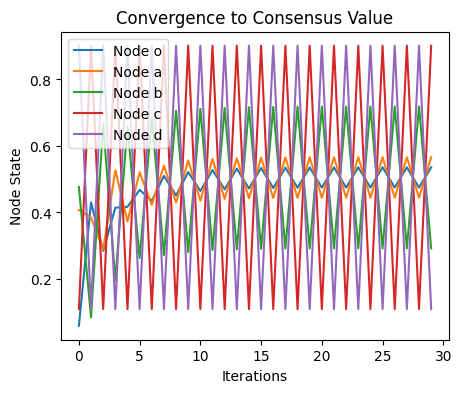

In [12]:
fig = plt.figure(figsize=(5, 4), dpi=100)
plot = plt.subplot(111)
node_names = ['o', 'a', 'b', 'c', 'd']

for node_index in range(5):
    node_state = x_evolution[node_index, :]
    plot.plot(range(iterations), node_state, label=f'Node {node_names[node_index]}')

plot.legend()
plot.set_title("Convergence to Consensus Value")
plt.xlabel('Iterations')
plt.ylabel('Node State')
plt.show()

## Exercise <2>

### Definition:
In this part we will again consider the network of Fig. 1, with weights (1). However, now we will simulate many particles moving around in the network in continuous time. Each of the particles in the network will move around just as the single particle moved around in Problem
1: the time it will stay in a node is exponentially distributed, and on average it will stay 1/ωi
time-units in a node i before moving to one of its outneighbors. The next node it will visit is based
on the probability matrix P = diag(ω)−1Λ, where ω = Λ1.

Your task is to simulate this system from two different perspectives: the particle perspective, i.e. “follow the particle”, and the node perspective, i.e. “observe from the node”.

Simulating the system from a particle perspective is exactly as in Problem 1, but here you have to follow many particles instead. To simulate the system from the node perspective you instead have to observe the particles from the node. When doing this you do not have to care about each single particle, but only about the number of particles in the node. Note that at node i, each particle in that node will stay there on average 1/ωi time units. Therefore, the node will pass along particles at a rate proportional to the number of particles in the node. In fact, if at time t the number of particles in node i is ni(t), it will pass along particles at a rate of ni(t)ωi. The departure times of the node can thus be seen as a Poisson process with rate ni(t)ωi. At each tick of the Poisson clock of the node, it will move a particle to a neighboring node. The node to which the particle will move is again based on the normalized transition rate matrix P.

Simulate the system from the two perspectives, and then answer the following questions (we have again provided a hint below):

### Exercise 1 >> Part a

Particle perspective:

>If 100 particles all start in node b, what is the average time for a particle to return to node b?

>How does this compare to the answer in Problem 1, why?


In [13]:
print(f"Graph G:\n{G}\n")
print(f"Transition Matrix (PMatrix):\n{np.array2string(PMatrix, precision=3, separator='  ')}\n")
print(f"Weight Vector (W_Vector):\n{np.array2string(W_Vector, precision=3, separator='  ')}\n")
print(f"Cumulative Q-Matrix (Cumulative_Q):\n{np.array2string(Cumulative_Q, precision=3, separator='  ')}\n")

particles_numbers = 100
simulations = particles_numbers * 1000
origin_node = 1                         # Assuming index of node 'b' is 1.
final_node = 1


average_return_time = avgTimeReturnJourney(origin_node, final_node, simulations)
print("Average return time:", average_return_time)
print("Simulation Error:", abs(average_return_time - expected_return_time))

Graph G:
DiGraph with 5 nodes and 10 edges

Transition Matrix (PMatrix):
[[0.     0.667  0.333  0.     0.   ]
 [0.     0.     0.75   0.25   0.   ]
 [0.6    0.     0.     0.4    0.   ]
 [0.     0.     0.333  0.     0.667]
 [0.     0.5    0.     0.5    0.   ]]

Weight Vector (W_Vector):
[0.6    1.     0.833  1.     0.667]

Cumulative Q-Matrix (Cumulative_Q):
[[0.4    0.8    1.     1.     1.   ]
 [0.     0.     0.75   1.     1.   ]
 [0.5    0.5    0.667  1.     1.   ]
 [0.     0.     0.333  0.333  1.   ]
 [0.     0.333  0.333  0.667  1.   ]]

Average return time: 6.7098276569538875
Simulation Error: 0.0014943236205544608


### Exercise 1 >> Part b

Node perspective:

>If 100 particles start in node o, and the system is simulated for 60 time units, what is
the average number of particles in the different nodes at the end of the simulation?

>Illustrate the simulation above with a plot showing the number of particles in each node
during the simulation time.

>Compare the simulation result in the first point above with the stationary distribution of
the continuous-time random walk followed by the single particles.

Final Particles Per Node:
Node o: 18.00
Node a: 18.00
Node b: 20.00
Node c: 24.00
Node d: 20.00
Expected Particles from Stationary Distribution:  [16.15384615 18.46153846 26.92307692 23.07692308 15.38461538]


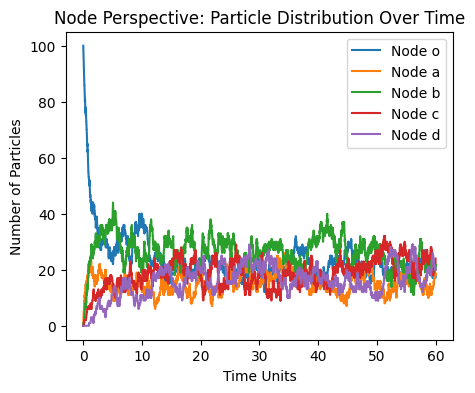

In [14]:
def simulate_node_view(starting_node, num_particles, simulation_duration, graph, V_Vector, PMatrix):
    particle_distribution = np.zeros(len(graph.nodes), dtype=float)
    particle_distribution[starting_node] = num_particles
    history = [particle_distribution.copy()]

    current_time = 0
    while current_time < simulation_duration:
        rates = particle_distribution * V_Vector
        total_rate = np.sum(rates)
        current_time += -np.log(np.random.rand()) / total_rate

        moving_particle = np.random.choice(len(graph.nodes), p=rates / total_rate)
        destination = np.random.choice(len(graph.nodes), p=PMatrix[moving_particle])
        particle_distribution[moving_particle] -= 1
        particle_distribution[destination] += 1

        history.append(particle_distribution.copy())
    
    return np.array(history), current_time


starting_node, num_particles, simulation_duration = 0, 100, 60

history, final_time = simulate_node_view(starting_node, num_particles, simulation_duration, G, W_Vector, PMatrix)

final_particle_counts = {node: round(count, 2) for node, count in zip(G.nodes, history[-1])}
eigenvalues, eigenvectors = np.linalg.eig(PMatrix.T)
stationary_distribution = eigenvectors[:, np.isclose(eigenvalues, 1)].real.squeeze()
pi_bar = stationary_distribution / stationary_distribution.sum()
average_particles_pi_bar = np.array(pi_bar) * num_particles

print("Final Particles Per Node:")
for node, count in final_particle_counts.items():
    print(f"Node {node}: {count:.2f}")
print("Expected Particles from Stationary Distribution: ", average_particles_pi_bar)


time_points = np.linspace(0, final_time, len(history))
plt.figure(figsize=(5, 4))
for node_index, node_label in enumerate(G.nodes):
    plt.plot(time_points, history[:, node_index], label=f'Node {node_label}')
plt.legend()
plt.title("Node Perspective: Particle Distribution Over Time")
plt.xlabel('Time Units')
plt.ylabel('Number of Particles')
plt.savefig('ex2-b-1.png')
plt.show()

## Exercise 3

In this part we consider the open network of Figure 2, with transition rate matrix Λopen according to (2).
\begin{equation}
\mathbf{Λ}_{\text{open}} = 
\begin{array}{c|ccccc}
    & o & a & b & c & d \\
\hline
o & 0 & \frac{3}{4} & \frac{3}{4} & 0 & 0 \\
a & 0 & 0 & \frac{1}{4} & \frac{1}{4} & \frac{2}{4} \\
b & 0 & 0 & 0 & 1 & 0 \\
c & 0 & 0 & 0 & 0 & 1 \\
d & 0 & 0 & 0 & 0 & 0 \\
\end{array}
\end{equation}

For this system, particles will enter the system at node o according to a Poisson process with input rate λ. Each node will then pass along a particle according to a given rate, similar to what you did in Problem 2 with the “node perspective”. Let ω = Λ1 and let N(t) denote the vector of number of particles in each node at time t.

You will simulate two different scenarios that differ by what rate the nodes will pass along particles: i) proportional rate, and ii) fixed rate. In scenario i), each node i will pass along particles according to a Poisson process with rate equal to the number of particles in the node times the rate of the local Poisson clock of node i, i.e., the node i will pass along particles rate with rate ωiNi(t). In scenario ii), each node i will instead pass along particles with a fixed rate ωi.

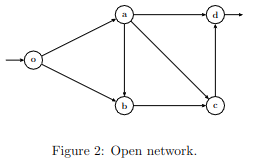

Since node d does not have a node to send its particles to, we assume that ωd = 2. When the Poisson clock of node d ticks, you could simply decrease the number of particles in the node by one (if there are any particles in the node). Equivalently think of another node d′ connected to node d, such that at every tick of the Poisson clock of d, it sends a particle to node d′.

The goal is to simulate the two systems and answer the following questions:


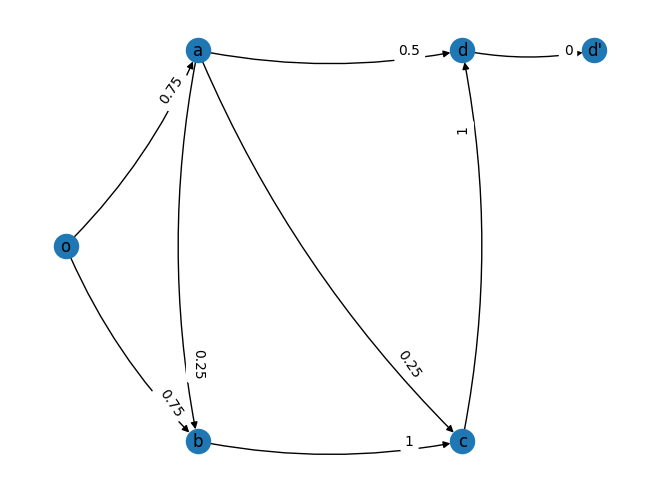

In [6]:
TIME_UNITS = 60
node_labels = ['o', 'a', 'b', 'c', 'd']

G = nx.DiGraph()
G.add_nodes_from(['o', 'a', 'b', 'c', 'd', "d'"])
G.add_weighted_edges_from([
    ('o', 'a', 3 / 4), ('o', 'b', 3 / 4),
    ('a', 'b', 1 / 4), ('a', 'c', 1 / 4), ('a', 'd', 2 / 4),
    ('b', 'c', 1), ('c', 'd', 1), ('d', "d'", 0)
])
node_positions = {
    'o': (-2, 0), 'a': (-1, 1), 'b': (-1, -1),
    'c': (1, -1), 'd': (1, 1), "d'": (2, 1)
}

nx.draw(G, pos=node_positions, with_labels=True, connectionstyle='arc3, rad=0.1')
edge_labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_labels, label_pos=0.20)
plt.show()

Lambda = np.array([
    [0, 3/4, 3/4, 0, 0],
    [0, 0, 1/4, 1/4, 2/4],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])
node_rates = np.sum(Lambda, axis=1)
num_nodes = len(G.nodes)
max_rate = np.max(node_rates)
QMatrix = Lambda / max_rate
QMatrix += np.diag(np.ones(len(node_rates)) - np.sum(QMatrix, axis=1))
CumulativeQ = np.cumsum(QMatrix, axis=1)

# Function to choose the starting node based on the proportional rate
def choose_starting_node(node_particles, rate):
    total_particles = rate + np.sum(node_particles)
    cumulative_distribution = np.cumsum(node_particles) / total_particles

    epsilon = 1e-6
    cumulative_distribution[-1] += epsilon

    random_number = np.random.rand()

    chosen_node = np.searchsorted(cumulative_distribution, random_number)

    return chosen_node, total_particles

# Function to choose the starting node based on a fixed rate
def choose_starting_node_fixed_rate(rate):
    total_rate = rate + (num_nodes - 1) 

    node_rates = np.zeros(num_nodes)
    node_rates[5] = rate  
    node_rates[:5] = 1  

    cumulative_distribution = np.cumsum(node_rates) / total_rate
    chosen_node = np.searchsorted(cumulative_distribution, np.random.rand())

    return chosen_node, total_rate

def plot_fixed_rate_results(transition_events, particles_history, rate):
    plt.figure()
    for i in range(num_nodes - 1):
        plt.plot(transition_events, particles_history[:, i], label=f'Node {node_labels[i]}')
    plt.legend()
    plt.xlabel("Time units")
    plt.ylabel("Number of particles")
    plt.title(f"Input rate = {rate}")
    plt.savefig(f'{rate}.svg')
    plt.show()


### Exercise 1 >> Part a 
**Proportional rate:**

>Simulate the system for 60 time units and plot the evolution of the number of particles in each node over time with input rate λ = 100.

>What is the largest input rate that the system can handle without blowing up?

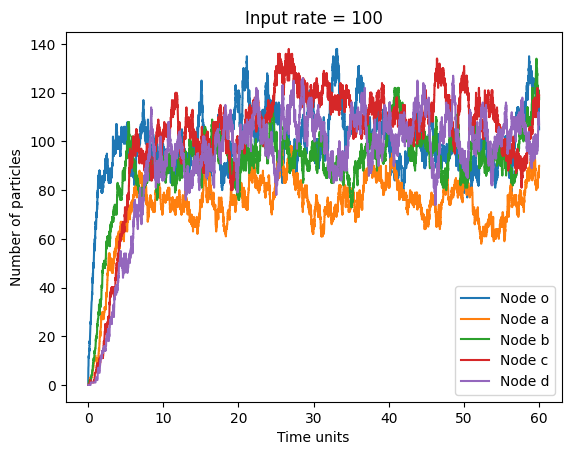

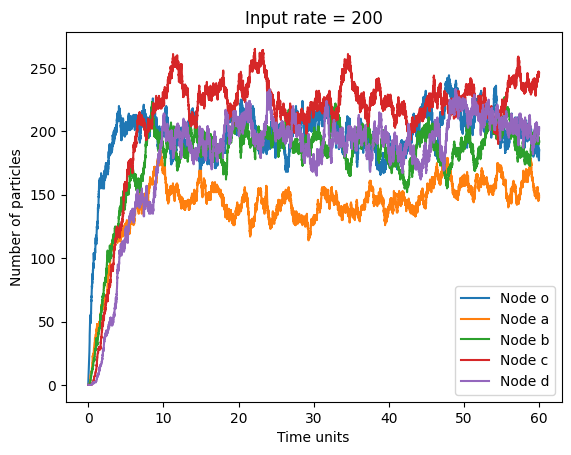

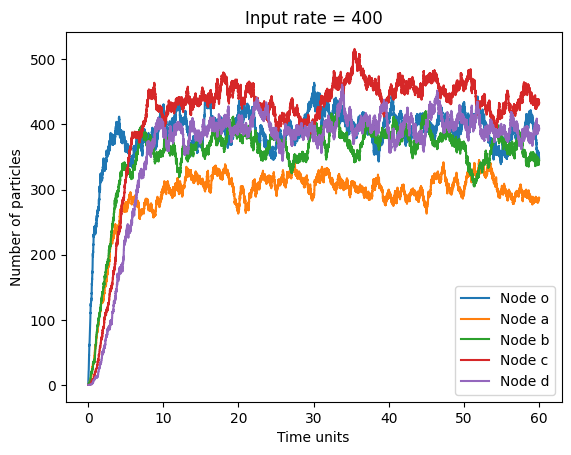

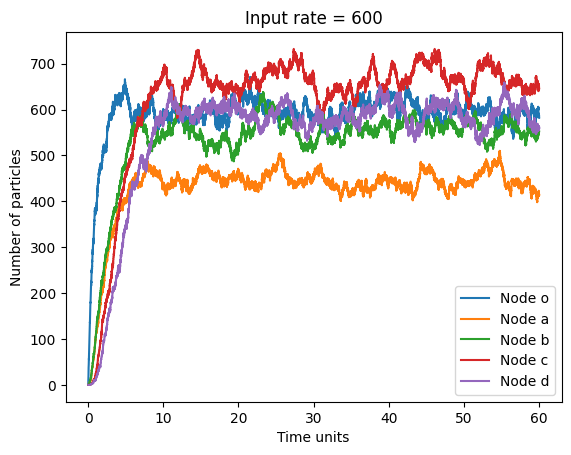

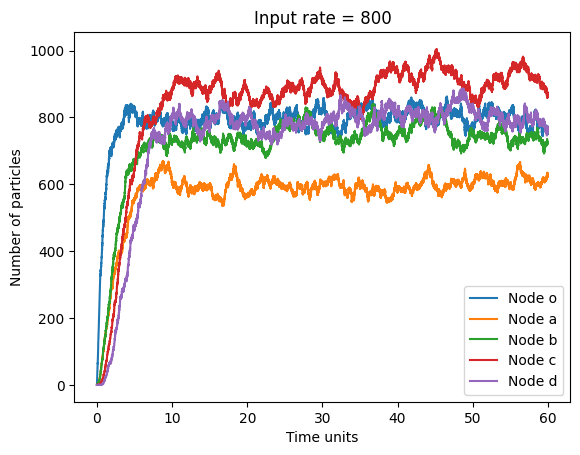

Does not blow up for any input rate.


In [7]:
TEST_INPUT_RATES_A = [i for i in range(200, 1000, 200)] 
SPECIFIC_INPUT_RATE_A = 100
BLOWINGUP_LIMIT_A = 1000 

def simulate_system_a(time_units, rate):
    node_particles = np.zeros(num_nodes - 1)
    transition_events = [0]
    particles_history = np.array([[0, 0, 0, 0, 0]])

    while True:
        chosen_node, total_particles = choose_starting_node(node_particles, rate)
        next_transition_time = transition_events[-1] - np.log(np.random.rand()) / total_particles

        if chosen_node == num_nodes - 1: 
            node_particles[0] += 1
        elif chosen_node == 4:  
            node_particles[4] -= 1
        else:
            next_node = np.where(CumulativeQ[chosen_node] > np.random.rand())[0][0]
            node_particles[chosen_node] -= 1
            node_particles[next_node] += 1

        transition_events.append(next_transition_time)
        particles_history = np.vstack([particles_history, [node_particles]])

        if next_transition_time > time_units:
            break

    return particles_history, transition_events
 
history_a, events_a = simulate_system_a(TIME_UNITS, SPECIFIC_INPUT_RATE_A)
plot_fixed_rate_results(events_a, history_a, SPECIFIC_INPUT_RATE_A)

no_blowup_a = True
max_stable_rate_a = SPECIFIC_INPUT_RATE_A
for test_rate in TEST_INPUT_RATES_A:
    history_a, events_a = simulate_system_a(TIME_UNITS, test_rate)
    plot_fixed_rate_results(events_a, history_a, test_rate)
    if np.any(history_a[-1] > BLOWINGUP_LIMIT_A): 
        no_blowup_a = False 
        break

    max_stable_rate_a = test_rate
if no_blowup_a: 
    print("Does not blow up for any input rate.")
else:
    print(f"The largest input rate that the network can handle without blowing up is {max_stable_rate_a}.")



### Exercise 1 >> Part b
**Fixed rate:**

>Simulate the system for 60 time units and plot the evolution of number of particles in each node over time with input rate λ = 1.

>What is the largest input rate that the system can handle without blowing up? Motivate your answer.

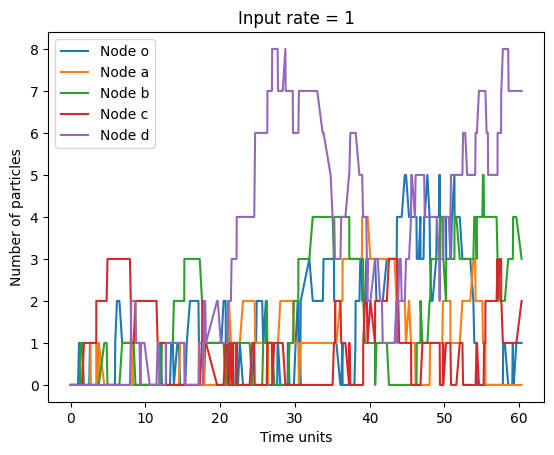

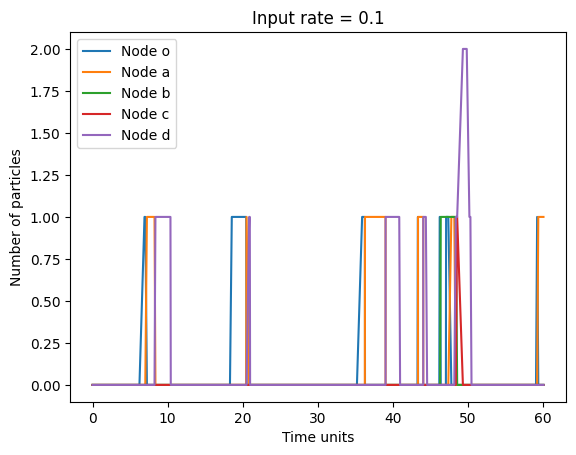

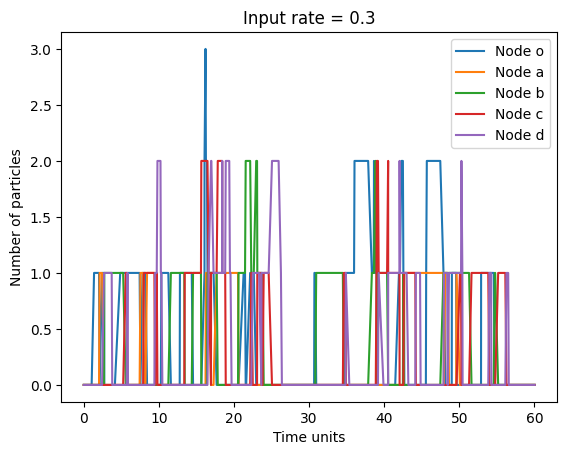

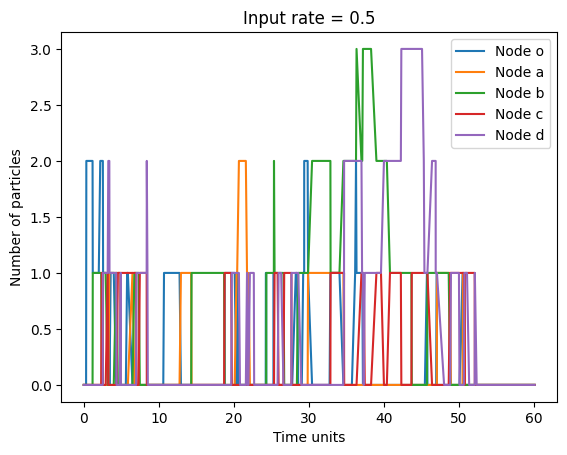

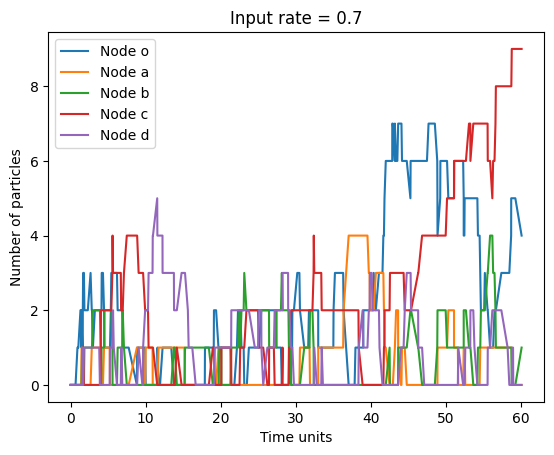

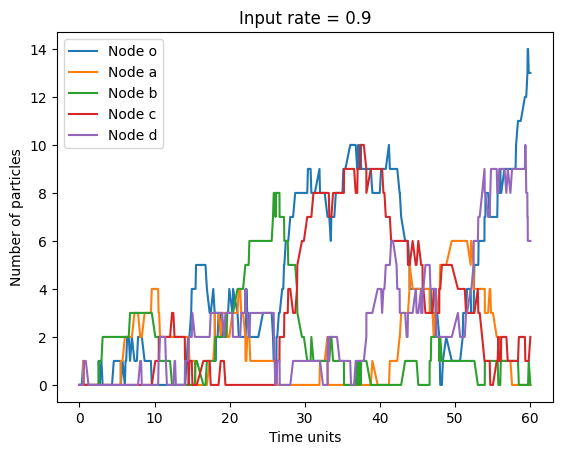

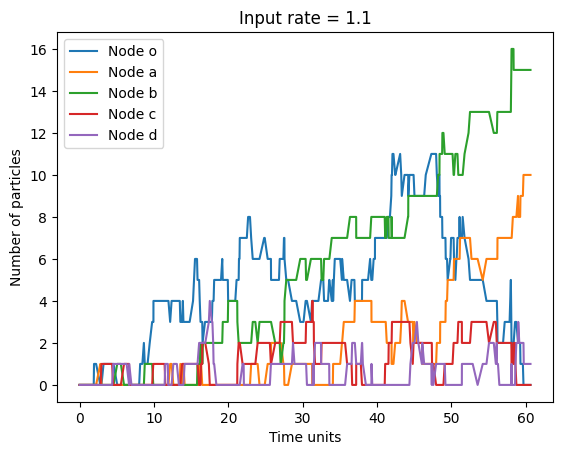

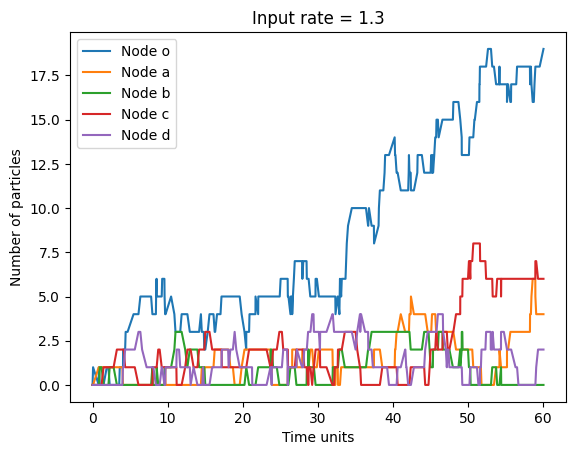

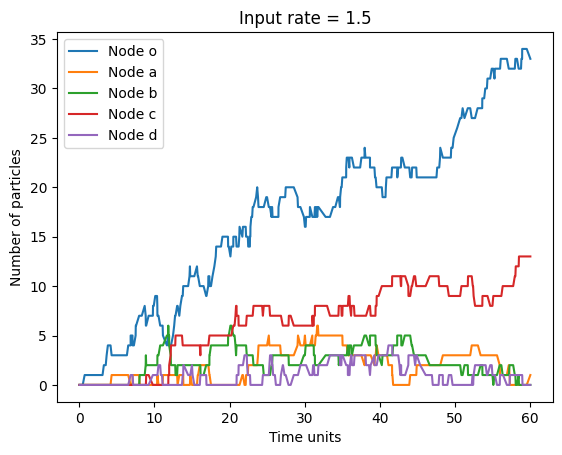

The largest input rate that the network can handle without blowing up is 1.3.


In [4]:
SPECIFIC_INPUT_RATE_B = 1
TEST_INPUT_RATES_B = [i / 10 for i in range(1, 22, 2)]  
BLOWINGUP_LIMIT_B = 30 

def simulate_system_b(time_units, rate):
    node_particles = np.zeros(num_nodes - 1)
    transition_events = [0]
    particles_history = np.array([[0, 0, 0, 0, 0]])

    while True:
        chosen_node, total_rate = choose_starting_node_fixed_rate(rate)
        next_transition_time = transition_events[-1] - np.log(np.random.rand()) / total_rate

        if chosen_node == num_nodes - 1:  
            node_particles[0] += 1
        elif chosen_node < 4 and node_particles[chosen_node] > 0:
            next_node = np.where(CumulativeQ[chosen_node] > np.random.rand())[0][0]
            node_particles[chosen_node] -= 1
            node_particles[next_node] += 1
        elif chosen_node == 4 and node_particles[4] > 0:
            node_particles[4] -= 1

        transition_events.append(next_transition_time)
        particles_history = np.vstack([particles_history, [node_particles]])

        if next_transition_time > time_units:
            break

    return particles_history, transition_events

history_b, events_b = simulate_system_b(TIME_UNITS, SPECIFIC_INPUT_RATE_B)
plot_fixed_rate_results(events_b, history_b, SPECIFIC_INPUT_RATE_B)

no_blowup_b = True
max_stable_rate_b = SPECIFIC_INPUT_RATE_B
for test_rate in TEST_INPUT_RATES_B:
    history_b, events_b = simulate_system_b(TIME_UNITS, test_rate)
    plot_fixed_rate_results(events_b, history_b, test_rate)
    if np.any(history_b[-1] > BLOWINGUP_LIMIT_B):
        no_blowup_b = False
        break
    max_stable_rate_b = test_rate
if no_blowup_b:
    print("Does not blow up for any input rate.")
else:
    print(f"The largest input rate that the network can handle without blowing up is {max_stable_rate_b}.")
